In [1]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy import stats

In [2]:
F = 100; #N
g0 = 9.81; #m/s2
Isp = 345;

mdotprop = F/(Isp * g0)
print('mdotprop: ', mdotprop)

OF = 2;
mdotfuel = mdotprop/(1+OF)
mdotox   = mdotprop - mdotfuel

print('mdotfuel: ', mdotfuel)
print('mdotox: ', mdotox)

mdotprop:  0.029546898314349448
mdotfuel:  0.00984896610478315
mdotox:  0.019697932209566296


In [3]:
Gox = 700; #kg/(m2s)

Dp0 = math.sqrt(4*mdotox/(math.pi*Gox))
print('Initial port diameter: ', Dp0)

Initial port diameter:  0.005985719462512696


In [21]:
#picked Dp0 = 0.25 in 
Dp0 = 0.5*25.4e-3;

Gox = 4*mdotox/(math.pi*Dp0**2)

print('Gox: ', Gox)

Gox:  155.49746567507157


In [22]:
#calculate rdot
regrate = pd.DataFrame(columns=['name','a','n'])

regrate_catwell = {'a': 2.11e-5, 'n':0.615,'name': 'Stanford'}
regrate_TMIT = {'a': 0.0000276, 'n':0.518,'name': 'TMIT'}
regrate_JPL1 = {'a': 8.96e-5,'n':0.35, 'name': 'JPL Non-Linear'}
regrate_JPL2 = {'a': 0.000058,'n':0.470, 'name': 'JPL Averaged'}

regrate=regrate.append(regrate_catwell,ignore_index=True)
regrate=regrate.append(regrate_JPL1,ignore_index=True)
regrate=regrate.append(regrate_JPL2,ignore_index=True)
regrate=regrate.append(regrate_TMIT,ignore_index=True)

In [23]:
regrate["rdot"]=regrate['a']*Gox**regrate["n"]

In [27]:
regrate[['a','n','rdot','name']]

,a,n,rdot,name
0,0.000021,0.615,0.000470,Stanford
1,0.000090,0.350,0.000524,JPL Non-Linear
2,0.000058,0.470,0.000622,JPL Averaged
3,0.000028,0.518,0.000377,TMIT


In [28]:
rdot = stats.mstats.gmean(list(regrate['rdot']))

In [29]:
print('mean rdot: ',rdot)

mean rdot:  0.000490163302935


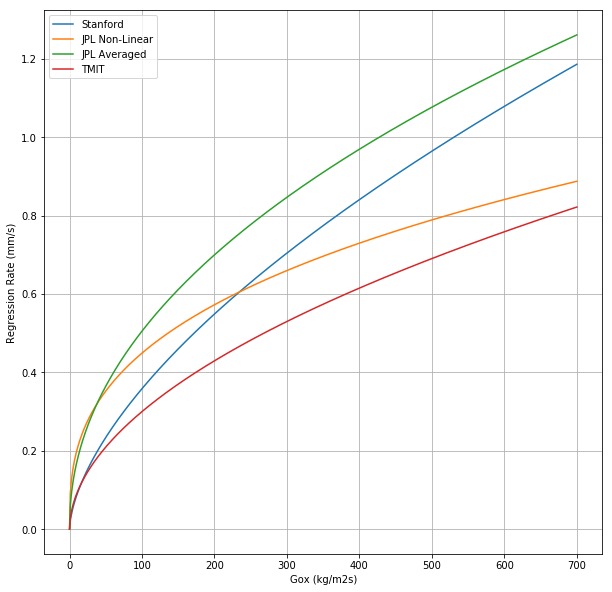

In [30]:
Grange = list(range(0,701,1))

plt.figure(figsize=(10,10))
for i in range(len(regrate)):
    rdotplt = [1000*regrate['a'].loc[i] * g**regrate['n'].loc[i] for g in Grange]
    plt.plot(Grange, rdotplt, label=regrate['name'].loc[i])
    
#
plt.ylabel('Regression Rate (mm/s)');
plt.grid(True)
plt.xlabel('Gox (kg/m2s)')
plt.legend(loc='upper left')


In [31]:
rhof = 1.1852*1000;

L = mdotfuel/(math.pi*rhof*Dp0*rdot)

In [34]:
L

0.42491749503500498

In [35]:
cstar = 1650;
Pc = 1.4*10**6
At=mdotprop*cstar/(Pc)

In [36]:
At

3.482313015619756e-05

In [84]:
Dt = 2*math.sqrt(At/math.pi)

In [85]:
Dt

0.006658692543309858

In [39]:
Dp0

0.0127

In [40]:
ve = F/mdotprop

In [41]:
ve

3384.4500000000003

In [42]:
#suppose exit  P = ambient P = 10^5 Pa

In [69]:
gamma=1.2;
Pe=1.013*10**5;
Me=math.sqrt((2/(gamma-1))*((Pe/Pc)**((1-gamma)/gamma) -1))

In [70]:
Me

2.343341395268768

In [71]:
expratio = (1/Me) * ((2/(gamma+1))*(1+((gamma-1)/2)*Me**2 ))**((gamma+1)/(2*gamma-2))

In [72]:
expratio

2.8053047150097097

In [77]:
Ae = expratio*At 

In [81]:
De=2*math.sqrt(Ae / math.pi)

In [82]:
De

0.011152673371194537

In [86]:
Dt

0.006658692543309858